In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [152]:
#importing the dataset
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


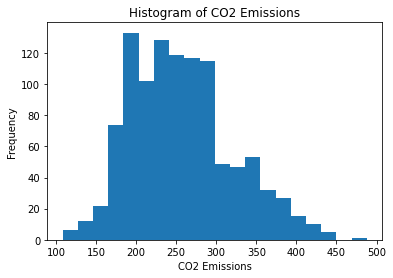

In [153]:
#HISTOGRAM OF CO2 EMISSIONS due to TRANSMISSION
plt.hist(df['CO2EMISSIONS'], bins=20)
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emissions')
plt.show()


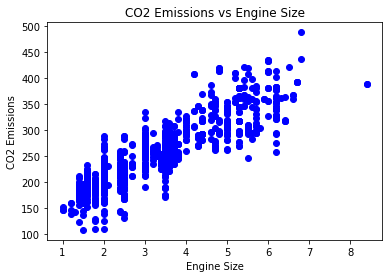

In [154]:
   
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions vs Engine Size')
plt.show()
    

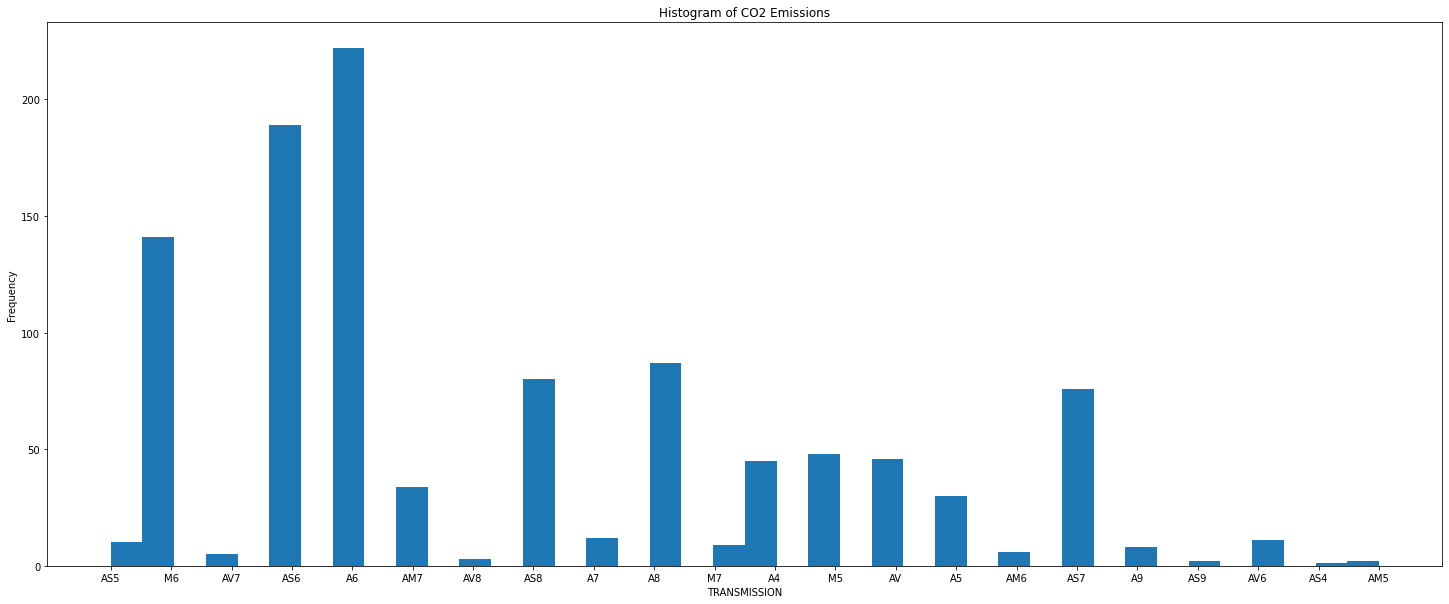

In [155]:
#make the figure bigger
plt.figure(figsize=(25,10))
plt.hist(df['TRANSMISSION'],bins=40)
plt.xlabel('TRANSMISSION')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emissions')
plt.show()


In [156]:
#check for null values
df.isnull().sum()


MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [157]:
#convert MAKE using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MAKE'] = le.fit_transform(df['MAKE'])
df.head(5)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,0,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,0,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,0,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,0,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [158]:
df['MODEL'] = le.fit_transform(df['MODEL'])
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,329,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,0,329,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,0,330,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,0,389,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,0,483,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [159]:
df['VEHICLECLASS'] = le.fit_transform(df['VEHICLECLASS'])
df['TRANSMISSION'] = le.fit_transform(df['TRANSMISSION'])
df['FUELTYPE'] = le.fit_transform(df['FUELTYPE'])

df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,2014,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221
2,2014,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136
3,2014,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255
4,2014,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244


In [160]:
#copy CO2EMISSIONS to a new column called Y
y = df['CO2EMISSIONS']
#remove the column from the original dataframe
df.drop('CO2EMISSIONS', axis=1, inplace=True)


In [161]:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,0.0,-1.575452,-0.010685,-1.244334,-0.951292,-0.998969,0.049460,1.011148,-0.828558,-0.993341,-0.884304,0.878553
1,0.0,-1.575452,-0.010685,-1.244334,-0.668653,-0.998969,1.548707,1.011148,-0.511433,-0.635329,-0.568571,0.342734
2,0.0,-1.575452,-0.005382,-1.244334,-1.304591,-0.998969,1.098933,1.011148,-1.779932,-1.315552,-1.630581,2.887876
3,0.0,-1.575452,0.307489,0.915493,0.108606,0.114242,0.199384,1.011148,-0.145519,-0.134112,-0.138027,-0.193086
4,0.0,-1.575452,0.805962,0.915493,0.108606,0.114242,0.199384,1.011148,-0.291885,-0.277317,-0.281542,0.074824


In [162]:
#split the data into training and testing sets (30% for testing)
from sklearn.model_selection import train_test_split
train_x, test_y, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

In [163]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x, y_train)
y_pred = lr.predict(test_y)


r2_score(y_test, y_pred)


0.9098400635256987

In [164]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(train_x, y_train)
y_pred = lasso.predict(test_y)
r2_score(y_test, y_pred)

0.9097966136946207

In [165]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_x, y_train)
y_pred = xgb.predict(test_y)
r2_score(y_test, y_pred)

0.9980968840810929

In [166]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(train_x, y_train)
y_pred = rf.predict(test_y)
r2_score(y_test, y_pred)


0.9983346659180289

In [167]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_x, y_train)
y_pred = knn.predict(test_y)
r2_score(y_test, y_pred)


0.7743384153458964

In [168]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(train_x, y_train)
y_pred = svr.predict(test_y)
r2_score(y_test, y_pred)


0.0190945837736336

In [171]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(train_x, y_train)
y_pred = dt.predict(test_y)
r2_score(y_test, y_pred)

0.9989849433925082